In [1]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [2]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow.
xlim = (-2,2)
ylim = (-2,2)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((210, 210), (105, 105), 0.02, ((-2.08, 2.08), (-2.08, 2.08)), 16)

In [3]:
cache = GridCache(g)
ψ = zeros_gridcurl(cache)
vel = zeros_gridgrad(cache);

In [4]:
zvort = ComplexF64[]
Γvort = Float64[]

Float64[]

In [5]:
τ=π

π = 3.1415926535897...

In [6]:
push!(zvort,0.0+1.0im)
push!(Γvort,-τ)

1-element Vector{Float64}:
 -3.141592653589793

In [7]:
push!(zvort,0.0-1.0im)
push!(Γvort,τ)

2-element Vector{Float64}:
 -3.141592653589793
  3.141592653589793

In [8]:
v = Vortex.Point.(zvort,Γvort)

2-element Vector{PotentialFlow.Points.Point{Float64, Float64}}:
 Vortex.Point(0.0 + 1.0im, -3.141592653589793)
 Vortex.Point(0.0 - 1.0im, 3.141592653589793)

In [9]:
U∞ = 1.0  ## speed
α = 0.0 ## angle in radians
fs = Freestreams.Freestream(U∞*exp(im*α))

Freestream(1.0 + 0.0im)

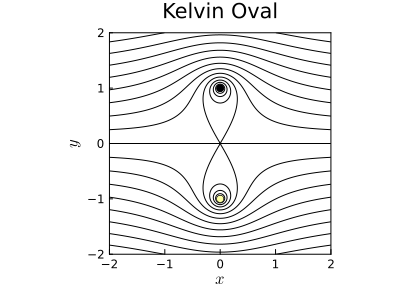

In [13]:
ψ .= ViscousFlow.streamfunction(fs,cache) + ViscousFlow.streamfunction(v,cache)
#p = plot(ψ,cache,color=:black,xlim=(-3,3),ylim=(-3,3),xlabel=L"x",ylabel=L"y",title="Kelvin Oval",levels=range(-3,3,length=31))
p = plot(ψ,cache,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Kelvin Oval",levels=range(-3,3,length=31))
plot!(p,v) ## This adds markers for the vortices
#scatter!(p,[-0.769, 0.769],[0,0],label="stagnation point",markersize=3)

#savefig("hw2_p5_2.png")

In [14]:
system = (v,fs)
z_eval = 0.0+0.0*im
induce_velocity(z_eval,system,0.0)

0.0 + 0.0im